In [123]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
%matplotlib inline

In [199]:
y = np.load('p_0.15_b_2.0_strats.npy')
np.all(y[0] == y[1])

False

In [118]:
np.max(y[0][-5])

0.1

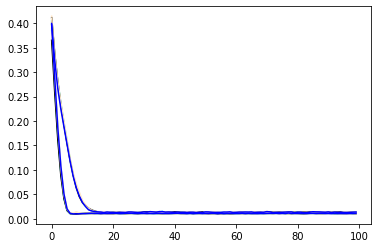

In [200]:
node_mean = np.mean(y, axis=2)

for i in range(10):
    plt.plot(node_mean[i], 
             color=list(matplotlib.colors.cnames.keys()).pop(i))

<Figure size 3000x3000 with 0 Axes>

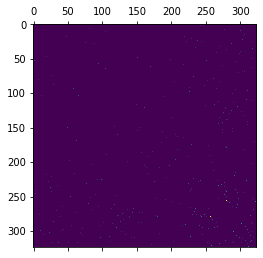

In [169]:
from bct import core_periphery_dir, modularity_und
plt.figure(figsize=(10, 10), dpi=300)
G = nx.from_numpy_array(y[2, 1])
G0 = nx.from_numpy_array(y[2, 0])
Gc = max(nx.connected_component_subgraphs(G), key=len)
C, q = core_periphery_dir(nx.to_numpy_array(Gc))
indices = np.argsort(C)
plt.matshow(nx.to_numpy_array(Gc)[:, indices][indices, :])
plt.show()
C1, q1 = modularity_und(nx.to_numpy_array(G))
C0, q0 = modularity_und(nx.to_numpy_array(G0))

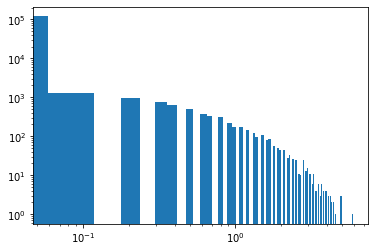

In [144]:
plt.hist(y[0, 1][np.triu_indices(500)], bins=100)
plt.yscale('log')
plt.xscale('log')

In [170]:
nx.average_shortest_path_length(Gc)

14.417822879639186

In [171]:
nx.average_clustering(Gc)

0.0

In [153]:
nx.average_shortest_path_length(G0)

2.9518476953907817

In [209]:
y.shape

(10, 100, 500, 2)

In [233]:
from tqdm import tqdm_notebook
from scipy import stats
p_vals = np.array([0.02, 0.05, 0.1, 0.15])
b_vals = np.array([0., 0.5, 1.0, 1.5, 2.0])
all_degs = np.zeros((4, 5, 10, 500))
mean_coops = np.zeros((4, 5, 10, 500))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        dev_Gs = np.load('p_{}_b_{}_dev_Gs.npy'.format(p, b))
        strats = np.load('p_{}_b_{}_strats.npy'.format(p, b))
        for k in range(10):
            G = nx.from_numpy_array(dev_Gs[k, 1])
            mean_coop = strats[k, -1, :, 0]
            all_degs[i, j, k] = np.array(sorted(dict(G.degree()).items()))[:, 1]
            mean_coops[i, j, k] = mean_coop
#             plt.scatter(np.array(sorted(dict(G.degree()).items()))[:, 1],
#                         mean_coop)
#             plt.show()
#             print(stats.spearmanr(np.array(sorted(dict(G.degree()).items()))[:, 1],
#                         mean_coop))

In [249]:
actual_means = np.transpose(np.stack([np.mean(mean_coops, axis=3)]*500), (1, 2, 3, 0))

In [259]:
import matplotlib
from matplotlib import font_manager 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica') 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

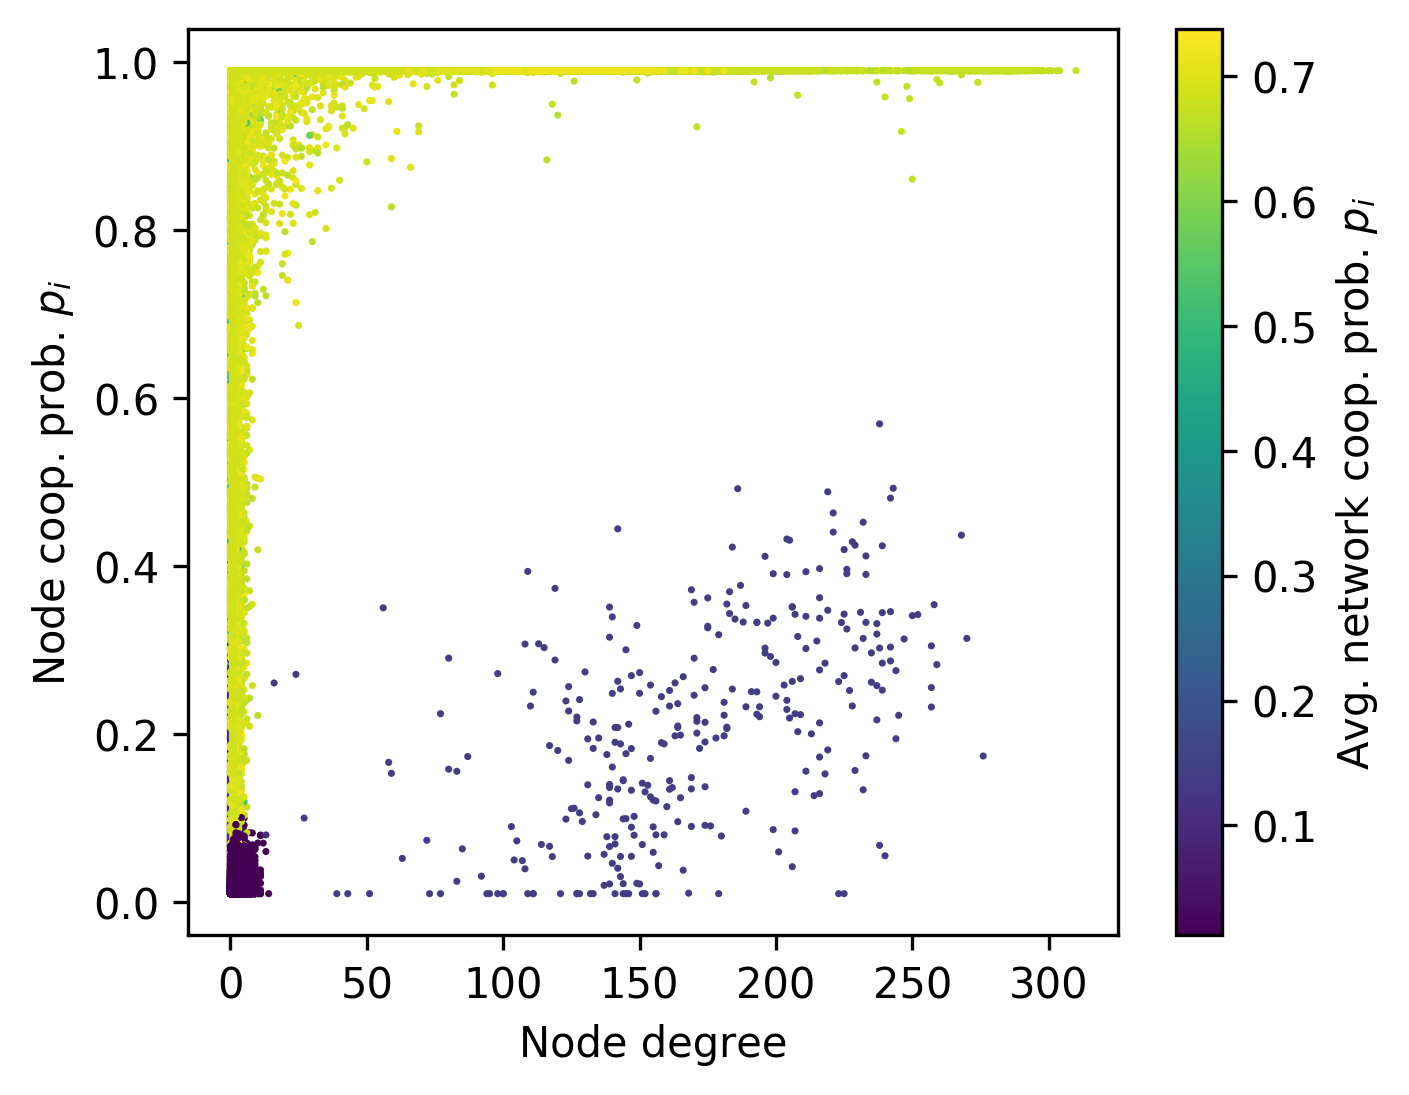

In [300]:
plt.figure(figsize=(5, 4), dpi=300)
plt.scatter(all_degs.reshape(-1), 
            mean_coops.reshape(-1), c=actual_means.reshape(-1), s=0.5)
cb = plt.colorbar()
cb.set_label('Avg. network coop. prob. $p_i$')
plt.xlabel('Node degree')
plt.ylabel('Node coop. prob. $p_i$')
plt.savefig('figures/coop_deg.png', transparent=True, bbox_inches='tight')
plt.show()

In [279]:
from tqdm import tqdm_notebook
from scipy import stats
p_vals = np.array([0.02, 0.05, 0.1, 0.15])
b_vals = np.array([0., 0.5, 1.0, 1.5, 2.0])
nonzero_weights = []
# mean_coops = np.zeros((4, 5, 10, 500))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        dev_Gs = np.load('p_{}_b_{}_dev_Gs.npy'.format(p, b))
        strats = np.load('p_{}_b_{}_strats.npy'.format(p, b))
        for k in range(10):
            x = dev_Gs[k, 1][np.triu_indices(500)]
            nonzero_weights.append(x[np.nonzero(x)])
nonzero_weights = np.hstack(nonzero_weights)

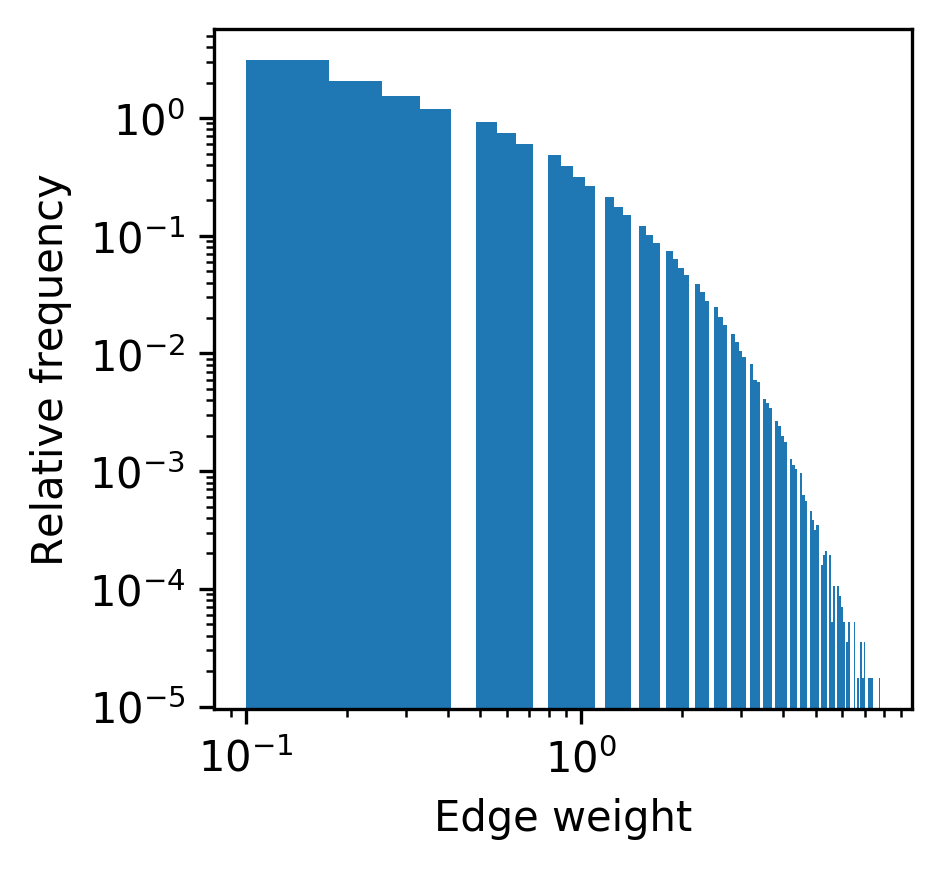

In [299]:
plt.figure(figsize=(3, 3), dpi=300)
plt.hist(nonzero_weights, bins=100, density=True)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Edge weight')
plt.ylabel('Relative frequency')
plt.savefig('figures/weights.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [285]:
from tqdm import tqdm_notebook
from scipy import stats
p_vals = np.array([0.02, 0.05, 0.1, 0.15])
b_vals = np.array([0., 0.5, 1.0, 1.5, 2.0])
all_strengths = np.zeros((4, 5, 10, 500))
# mean_coops = np.zeros((4, 5, 10, 500))
for i, p in enumerate(p_vals):
    for j, b in tqdm_notebook(list(enumerate(b_vals))):
        dev_Gs = np.load('p_{}_b_{}_dev_Gs.npy'.format(p, b))
        strats = np.load('p_{}_b_{}_strats.npy'.format(p, b))
        for k in range(10):
            all_strengths[i, j, k] = np.sum(dev_Gs[k, 1], axis=0)

In [286]:
all_strengths

array([[[[1.000e-01, 3.000e-01, 1.000e-01, ..., 1.520e+01, 5.100e+00,
          2.000e-01],
         [2.010e+01, 1.000e-01, 1.000e-01, ..., 1.000e-01, 4.000e-01,
          1.920e+01],
         [1.000e-01, 1.000e-01, 1.000e-01, ..., 4.010e+01, 1.000e-01,
          1.000e-01],
         ...,
         [5.000e-01, 1.000e-01, 1.000e-01, ..., 2.000e-01, 6.390e+01,
          4.000e-01],
         [1.000e-01, 6.000e-01, 2.000e-01, ..., 5.410e+01, 7.000e-01,
          2.000e-01],
         [2.000e-01, 1.000e-01, 2.000e-01, ..., 1.850e+01, 6.770e+01,
          2.000e-01]],

        [[3.000e-01, 2.000e+00, 1.200e+00, ..., 1.000e-01, 1.000e-01,
          1.630e+01],
         [1.000e-01, 1.000e-01, 1.000e-01, ..., 1.000e-01, 4.990e+01,
          4.190e+01],
         [2.000e-01, 3.000e-01, 1.000e-01, ..., 2.000e-01, 6.380e+01,
          3.580e+01],
         ...,
         [3.000e-01, 1.000e-01, 3.690e+01, ..., 1.000e-01, 4.000e-01,
          1.000e-01],
         [4.000e+01, 1.000e-01, 1.000e-01, ..., 0.

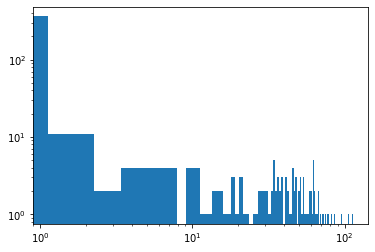

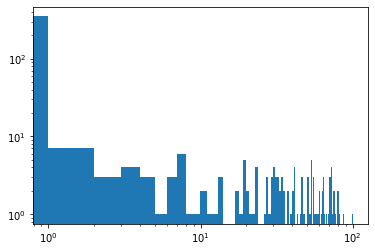

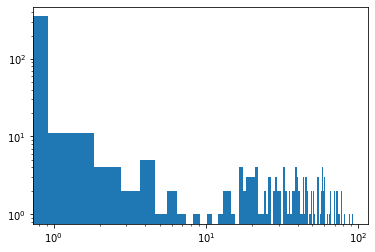

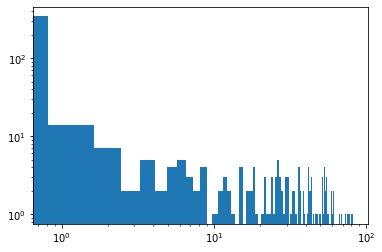

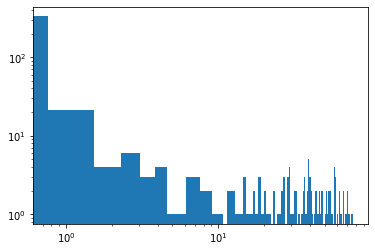

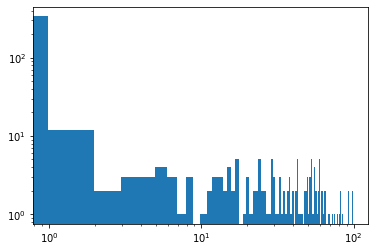

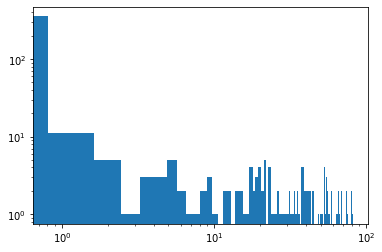

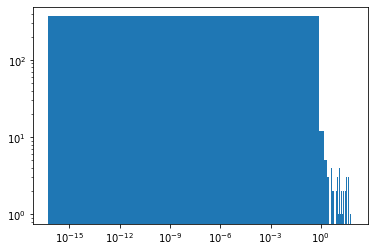

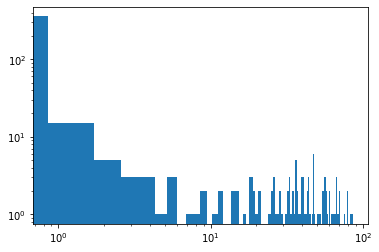

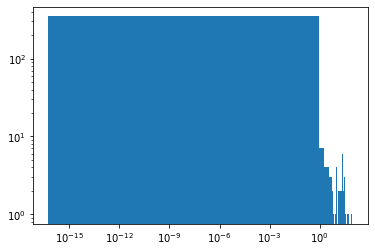

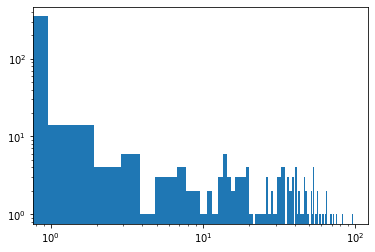

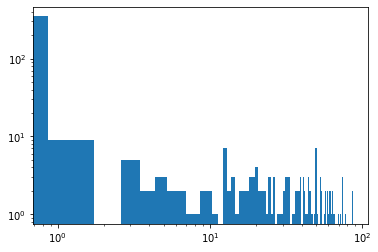

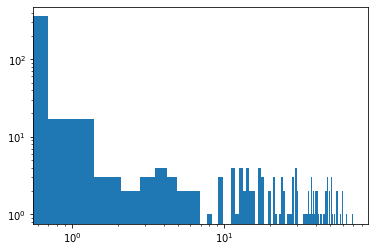

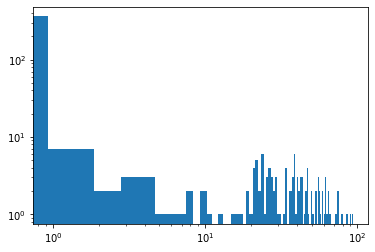

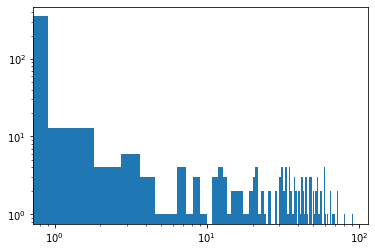

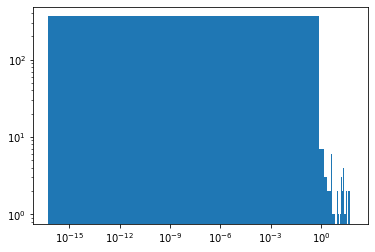

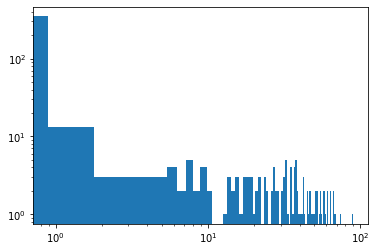

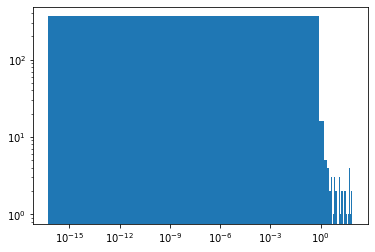

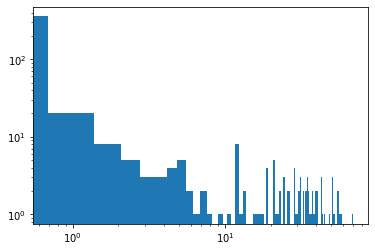

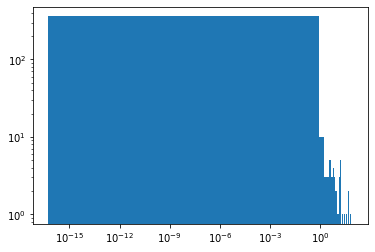

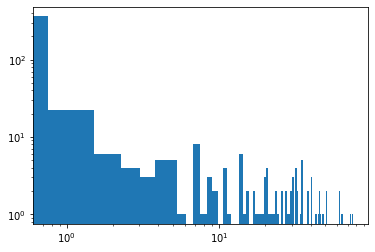

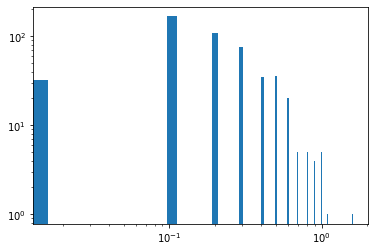

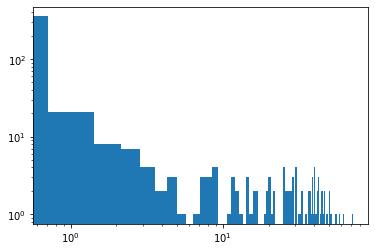

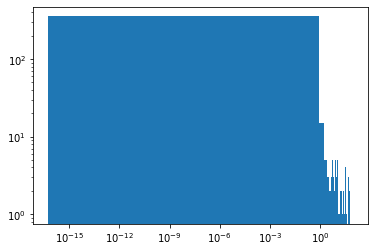

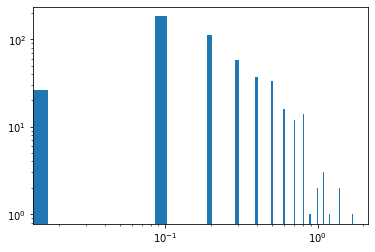

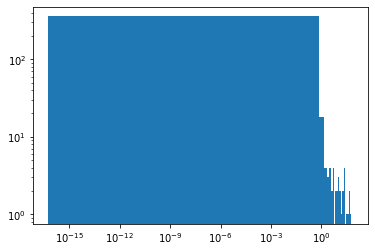

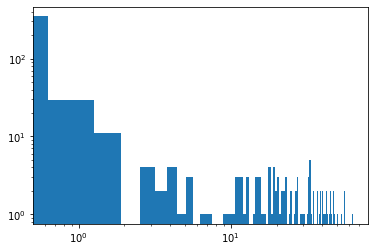

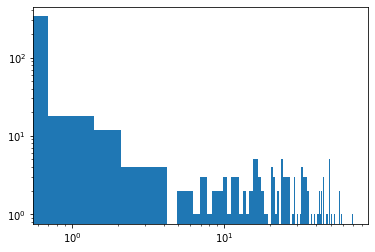

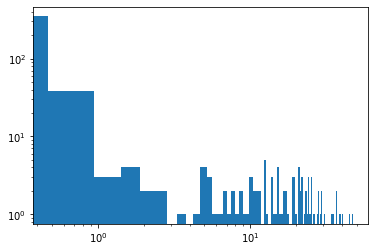

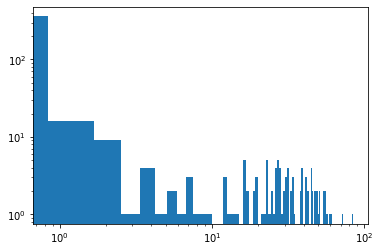

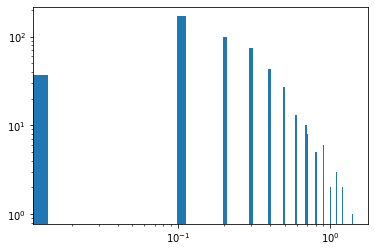

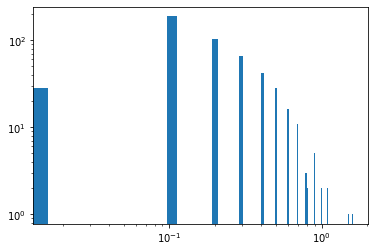

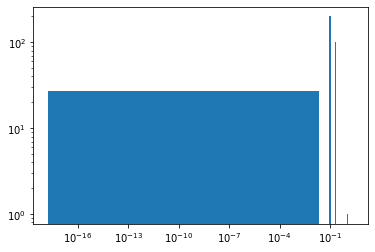

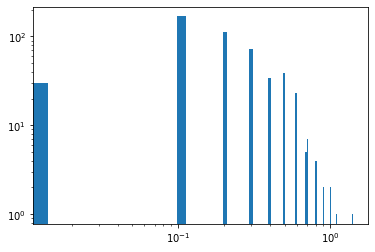

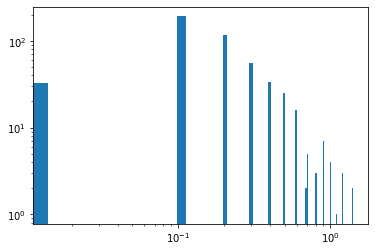

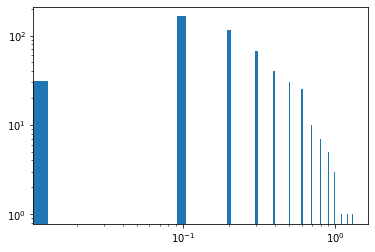

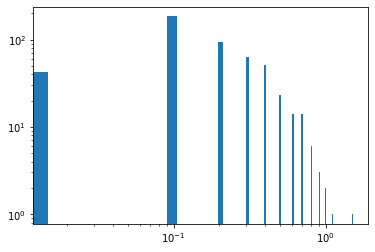

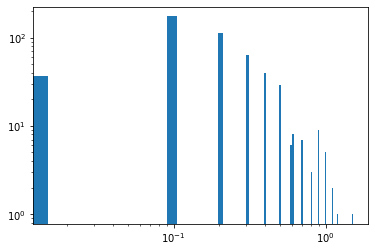

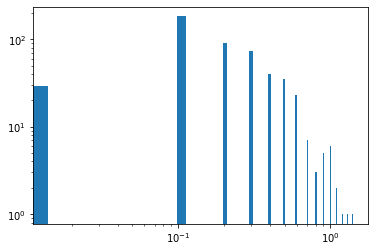

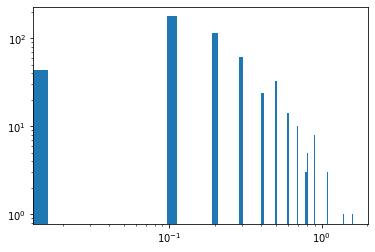

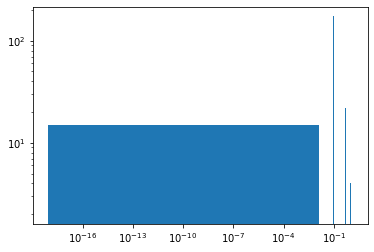

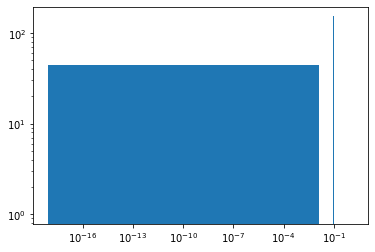

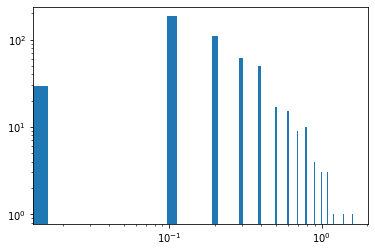

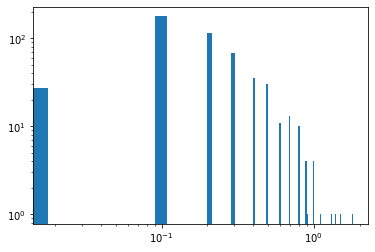

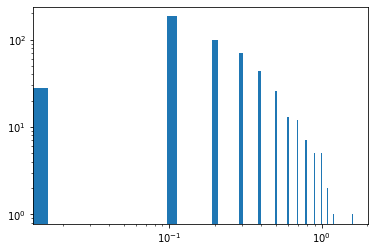

KeyboardInterrupt: 

In [288]:
for i in range(4):
    for j in range(5):
        for k in range(10):
            plt.hist(all_strengths[i, j, k], bins=100)
            plt.yscale('log')
            plt.xscale('log')
            plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
/usr/local/lib/python3.7/site-packages/powerlaw.py:1143: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
/usr/local/lib/python3.7/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


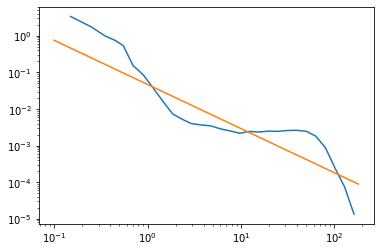

In [296]:
fit = powerlaw.Fit(all_strengths.reshape(-1), xmin=0.1, discrete=True)
fit.plot_pdf()
fit.power_law.plot_pdf()
plt.show()

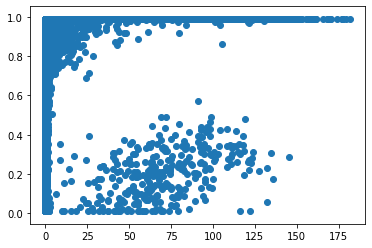

In [263]:
plt.scatter(all_strengths.reshape(-1), mean_coops.reshape(-1))

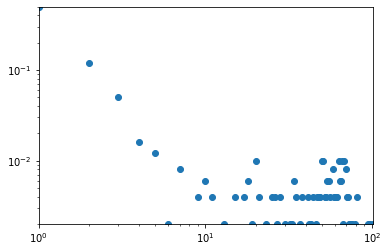

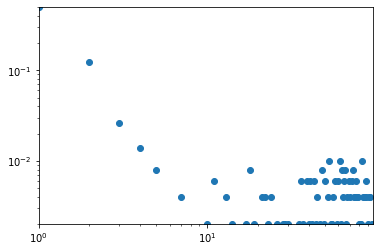

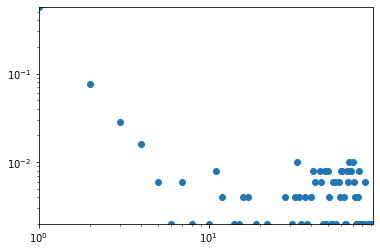

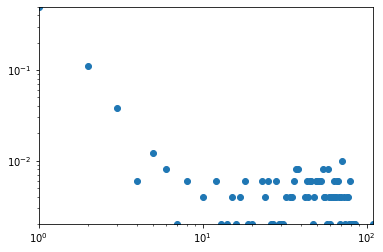

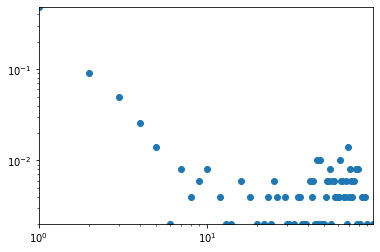

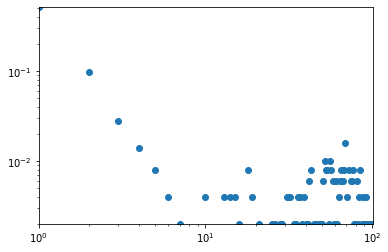

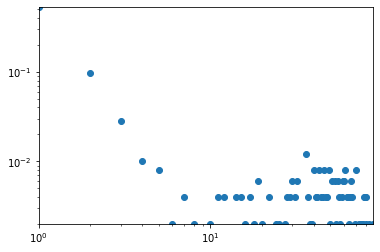

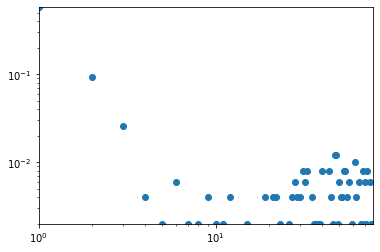

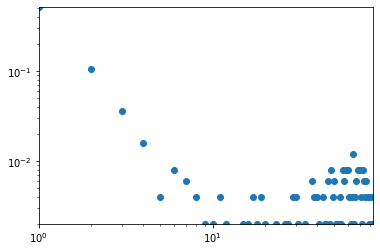

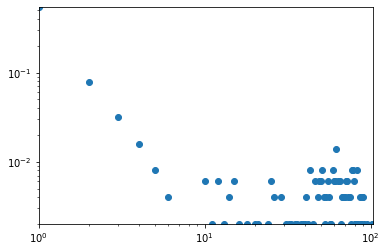

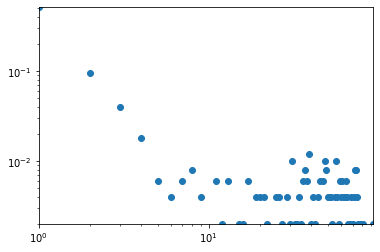

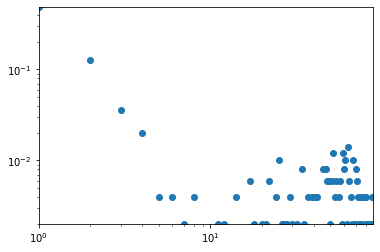

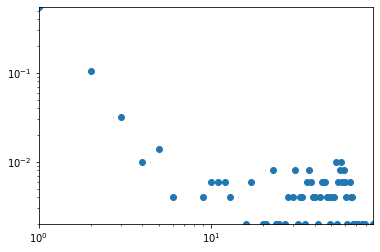

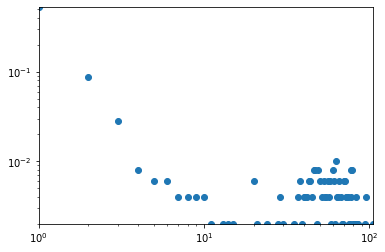

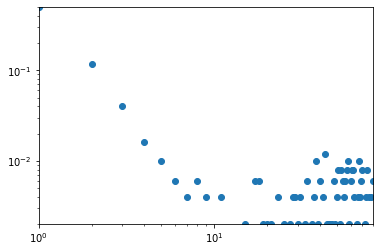

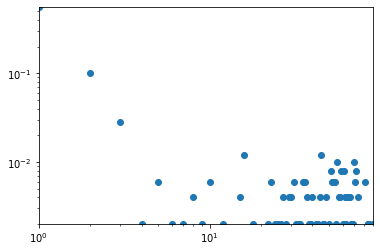

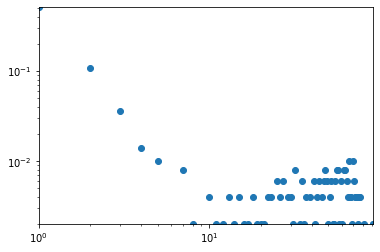

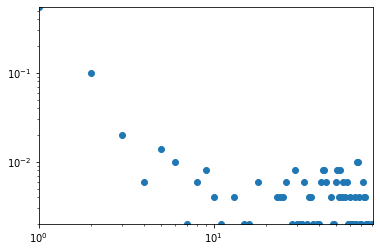

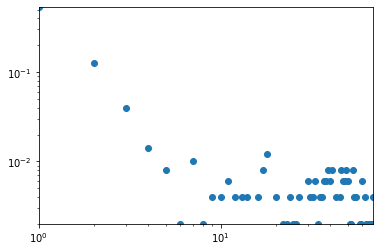

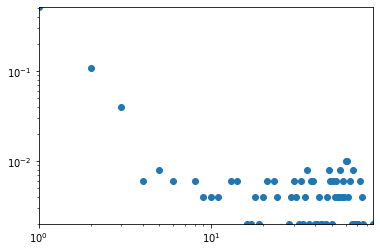

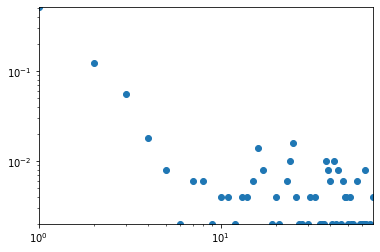

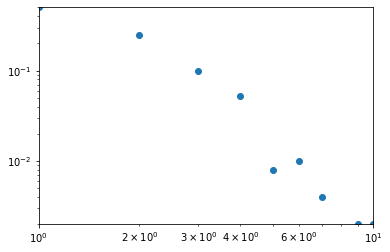

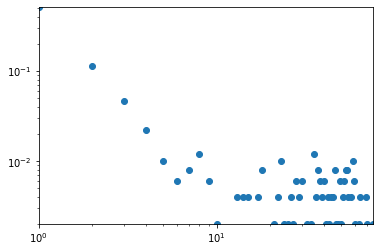

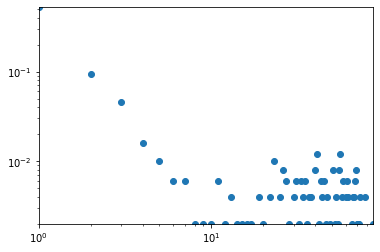

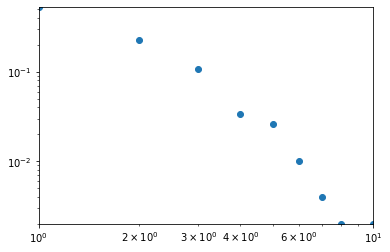

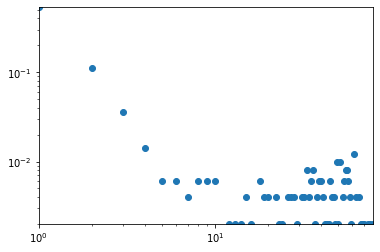

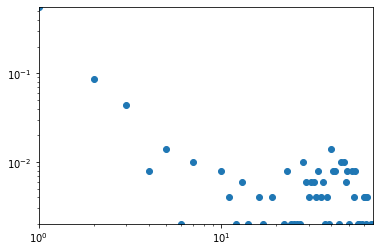

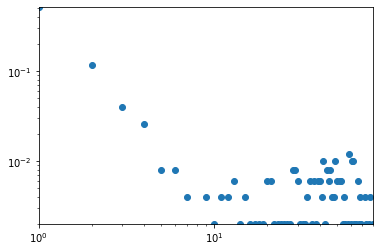

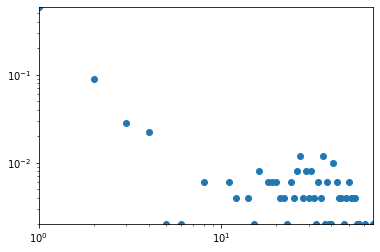

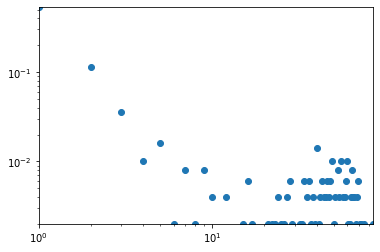

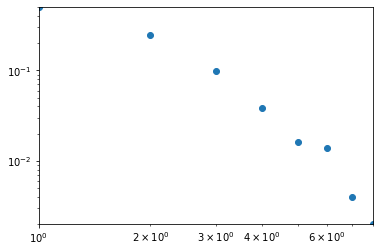

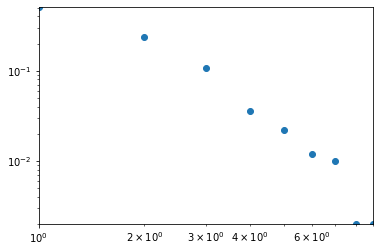

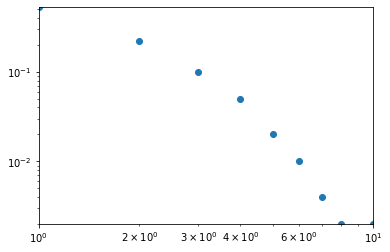

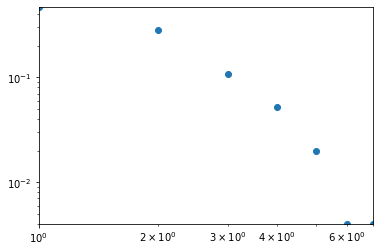

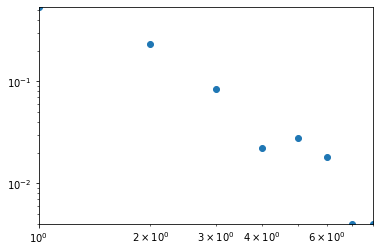

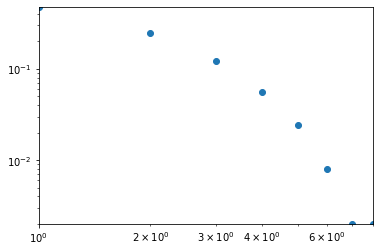

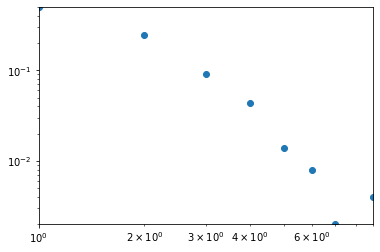

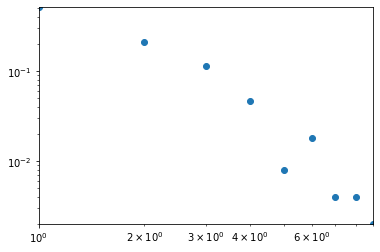

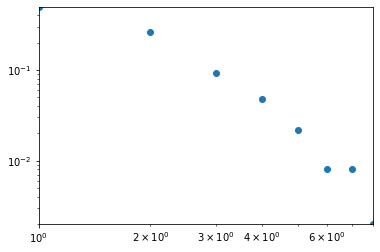

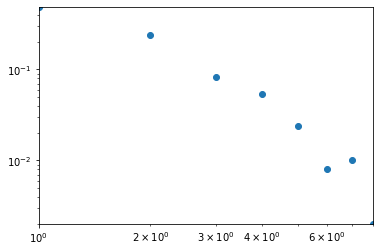

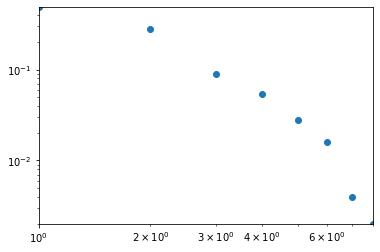

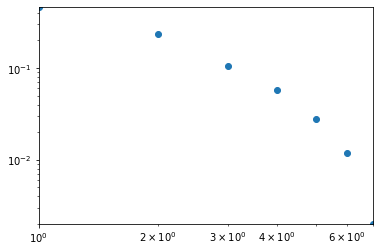

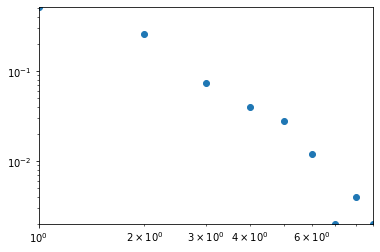

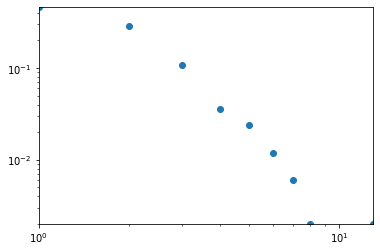

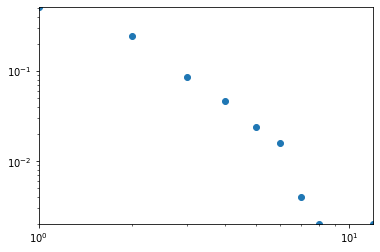

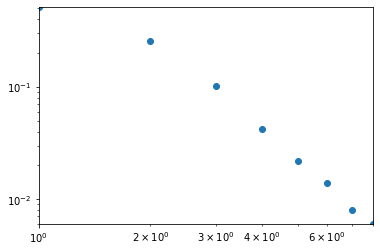

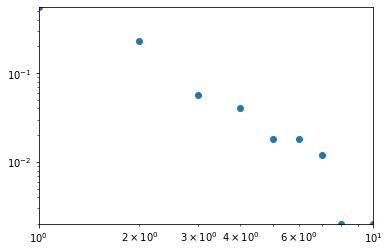

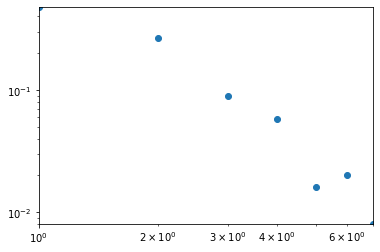

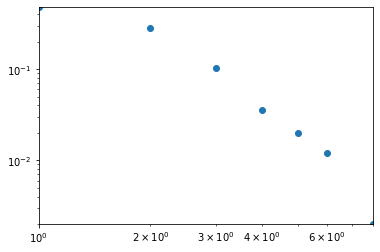

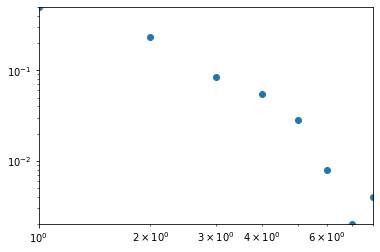

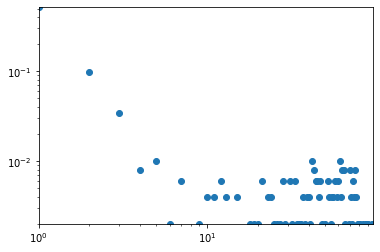

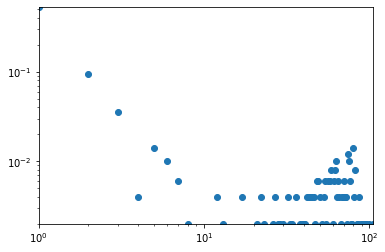

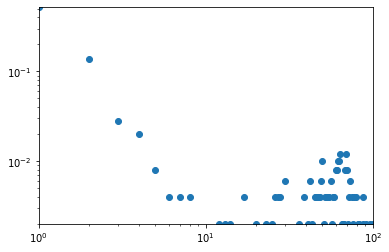

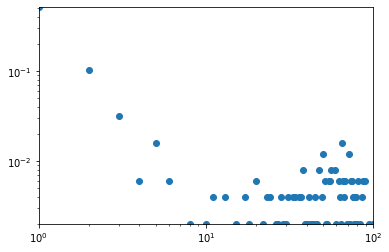

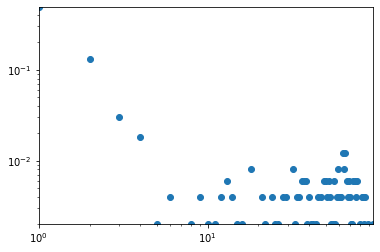

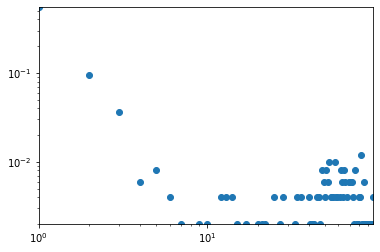

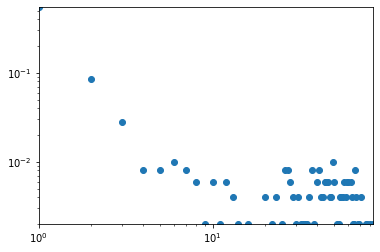

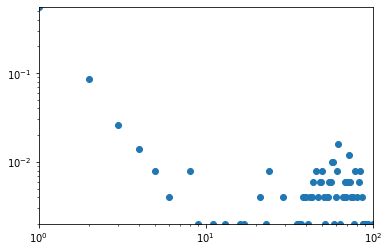

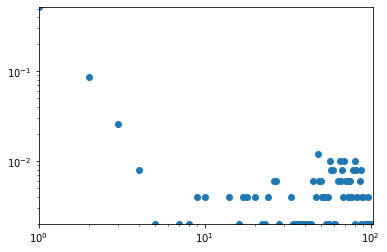

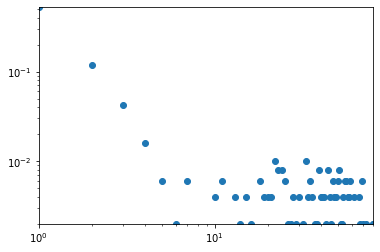

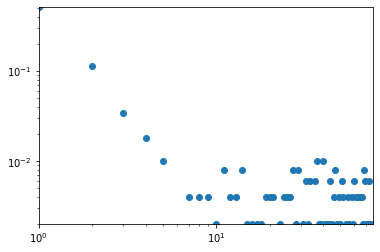

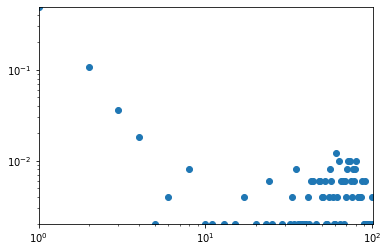

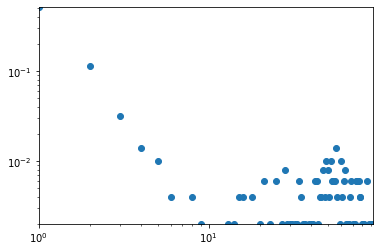

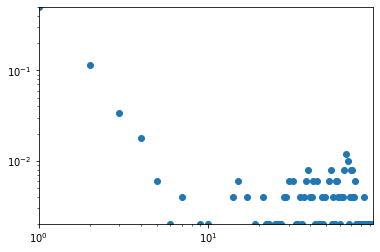

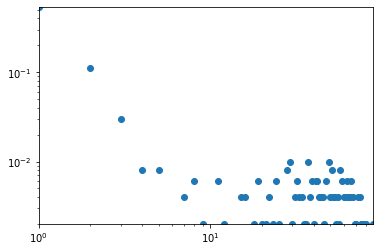

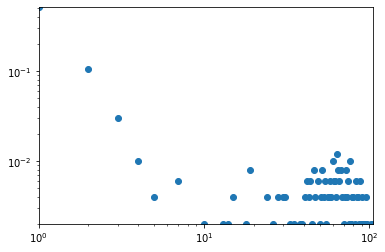

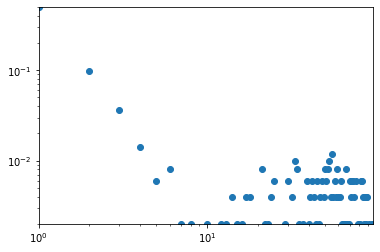

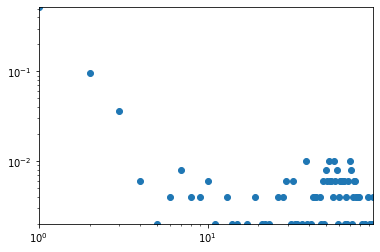

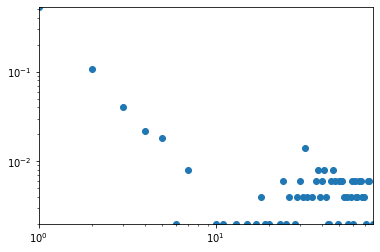

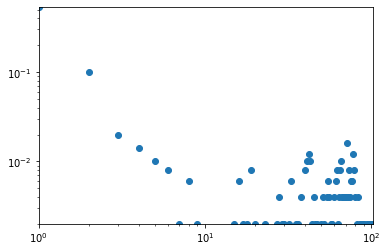

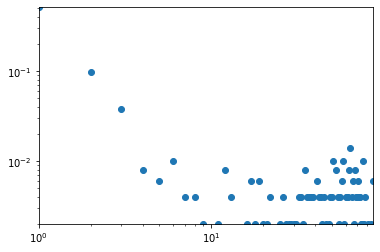

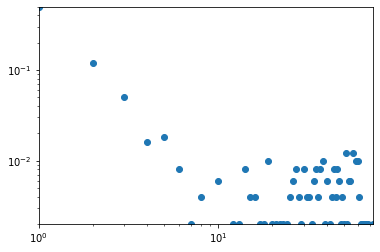

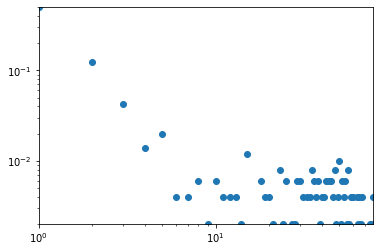

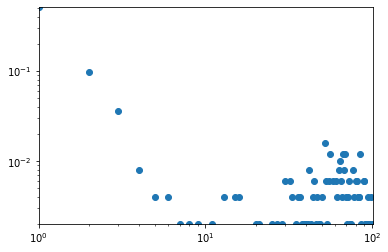

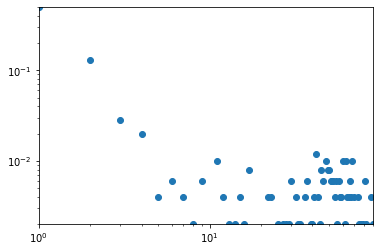

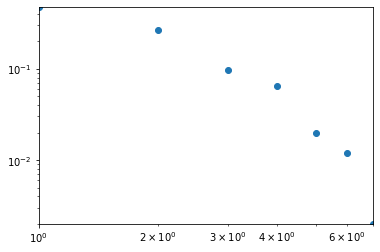

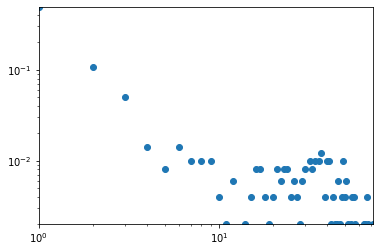

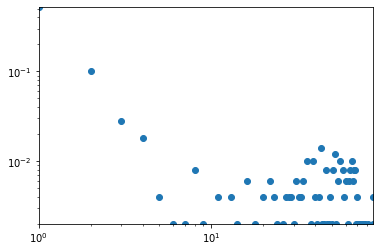

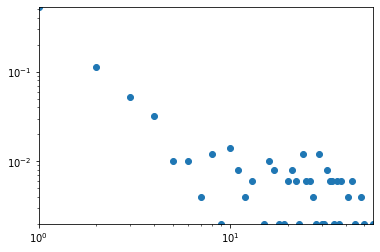

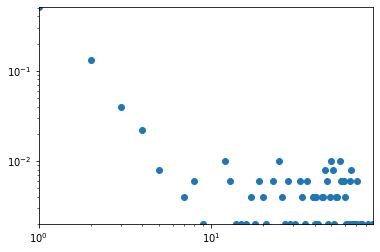

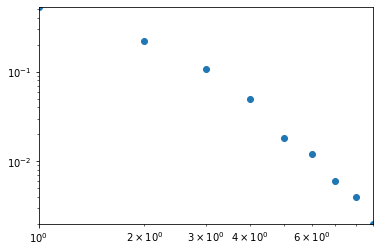

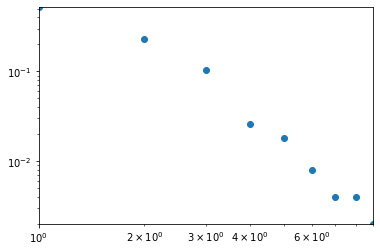

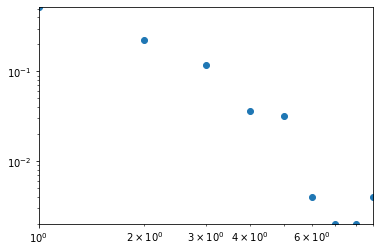

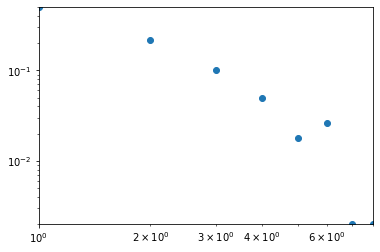

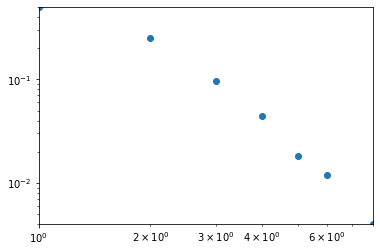

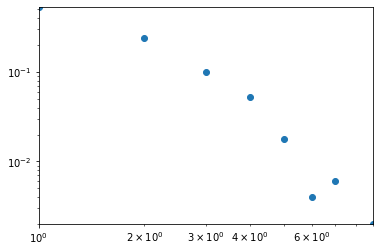

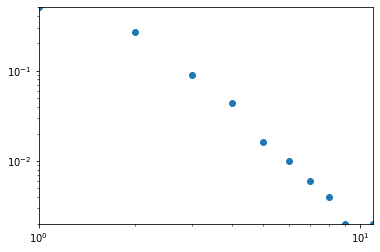

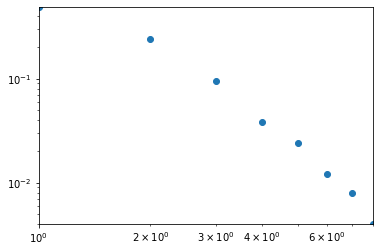

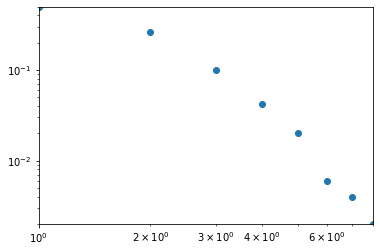

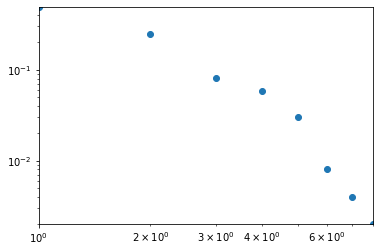

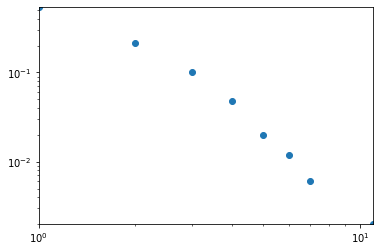

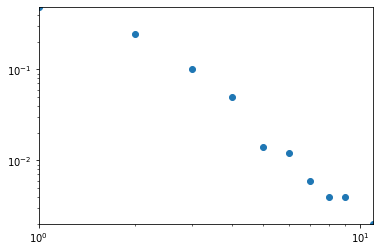

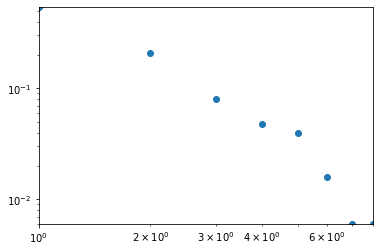

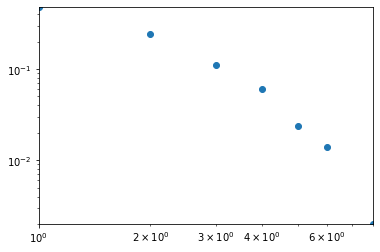

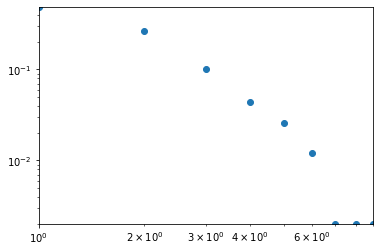

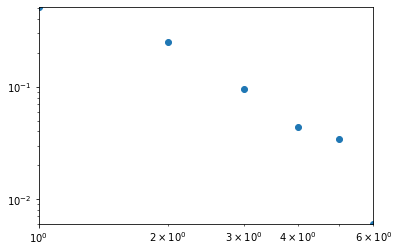

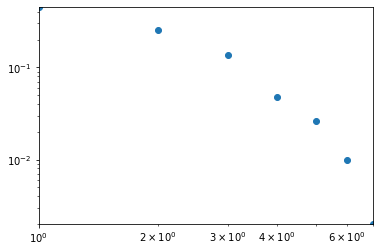

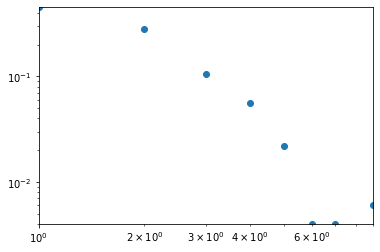

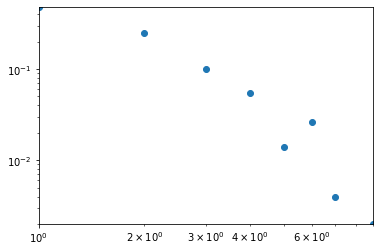

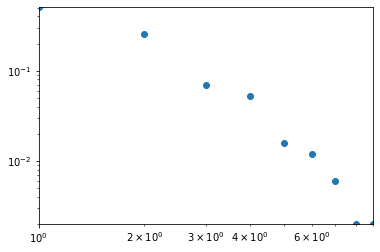

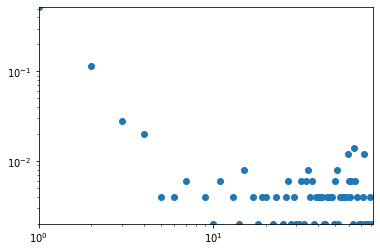

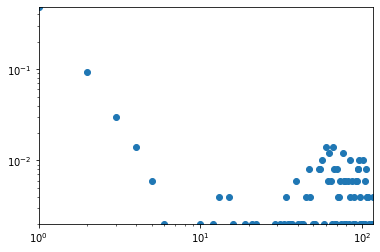

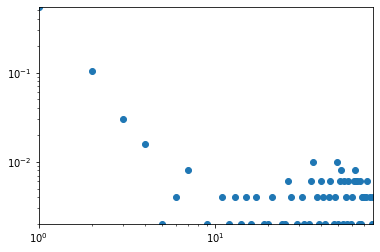

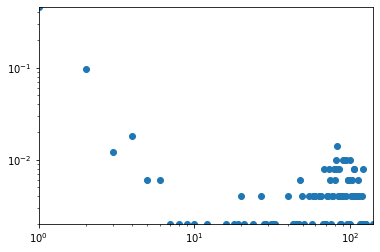

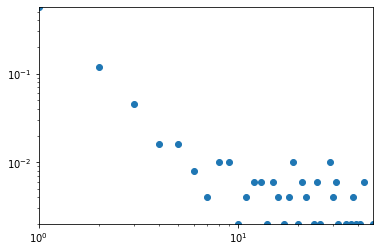

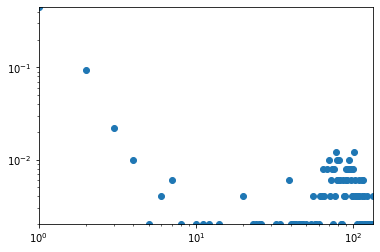

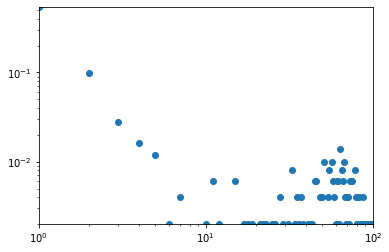

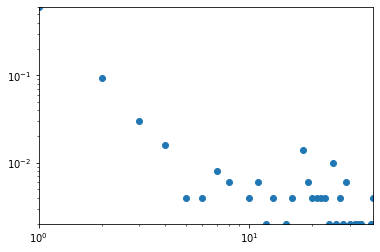

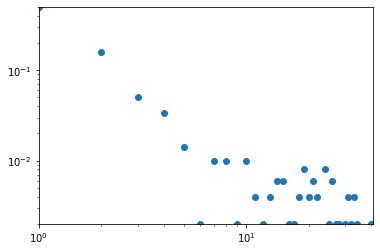

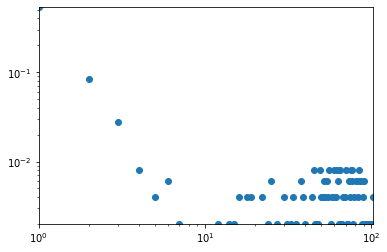

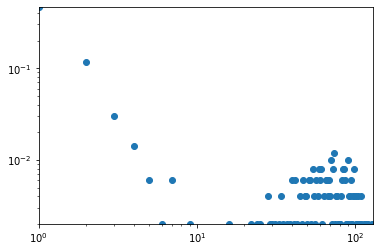

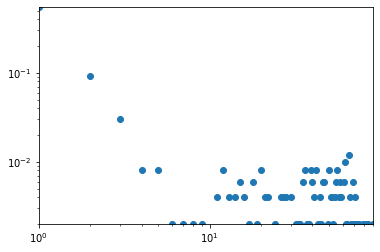

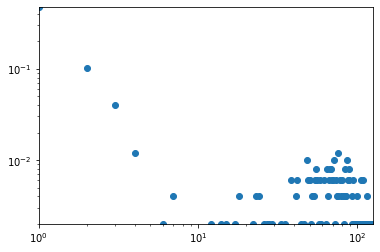

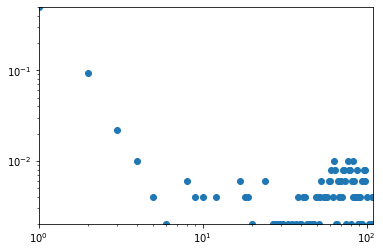

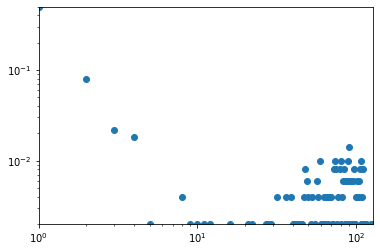

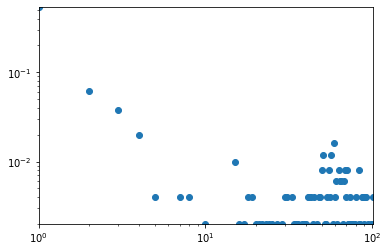

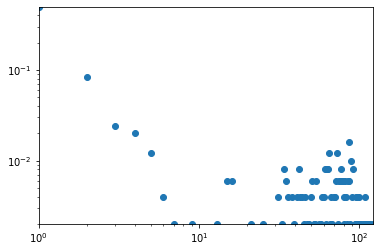

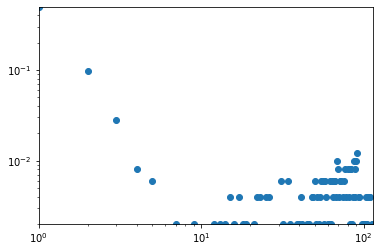

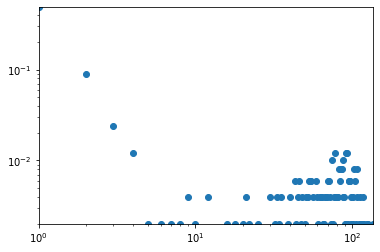

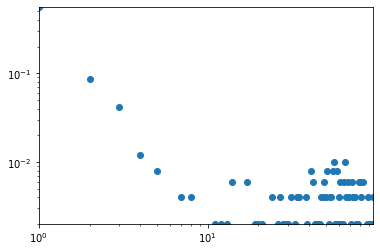

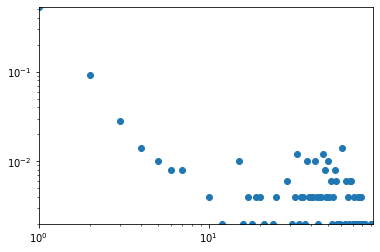

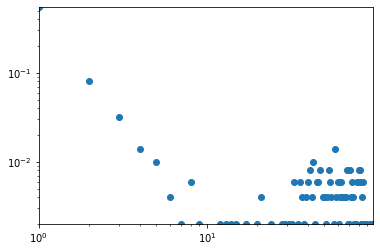

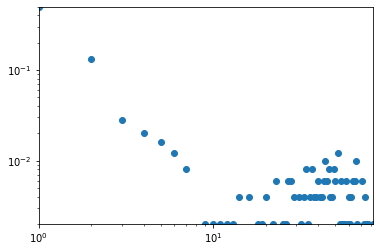

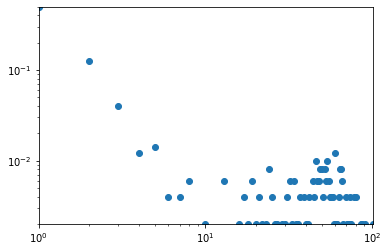

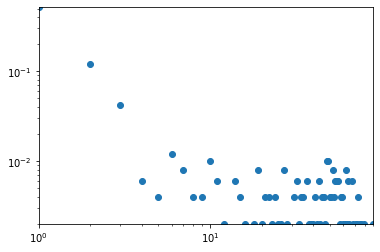

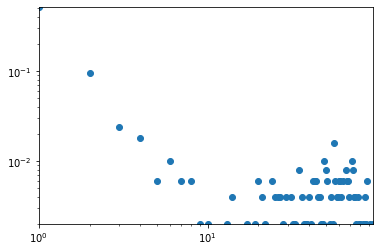

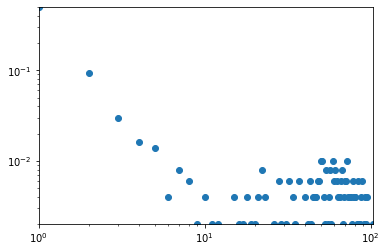

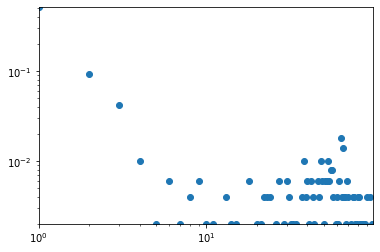

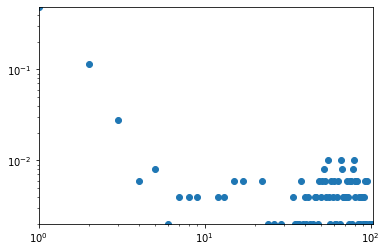

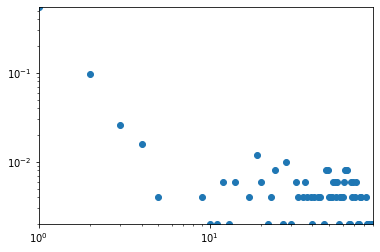

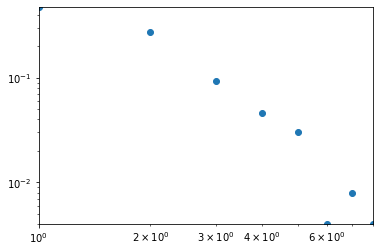

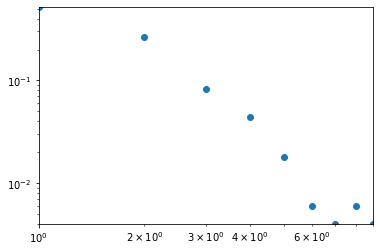

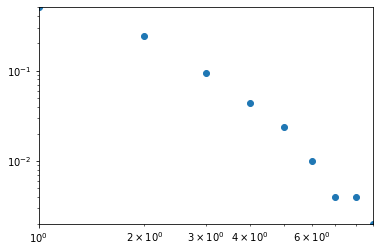

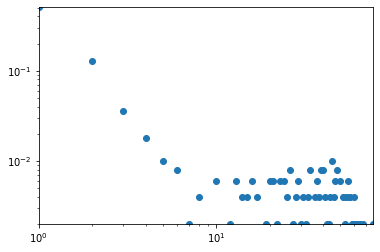

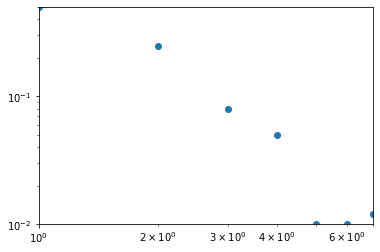

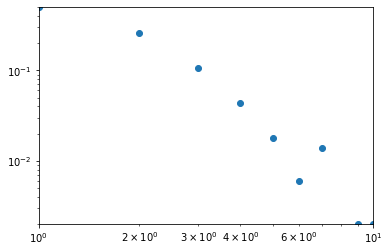

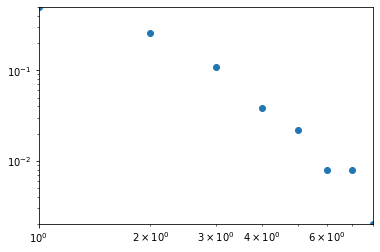

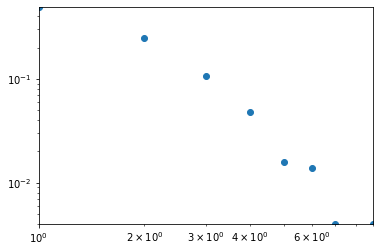

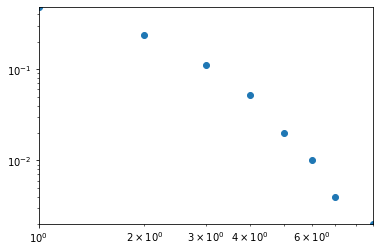

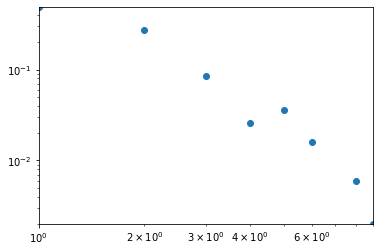

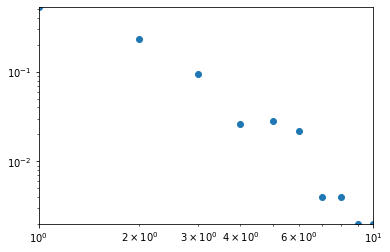

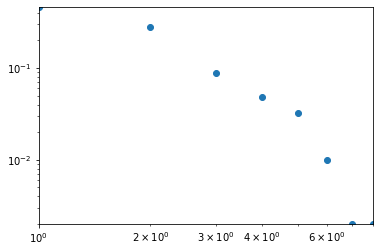

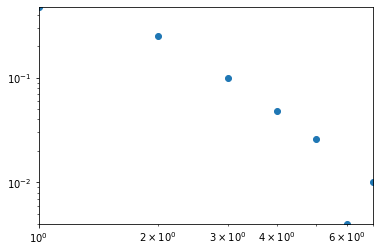

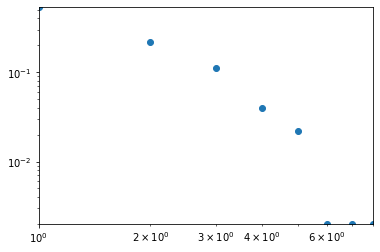

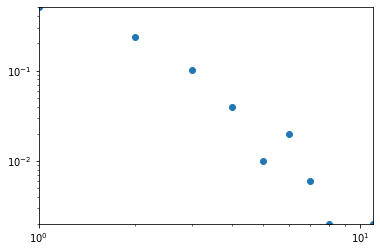

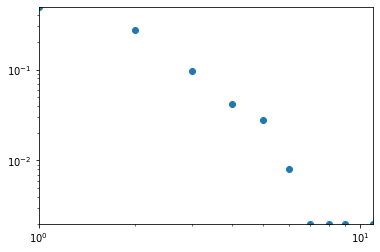

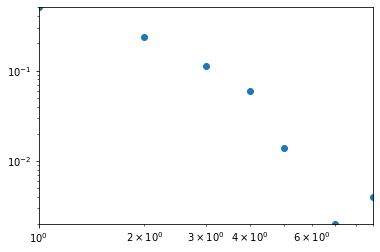

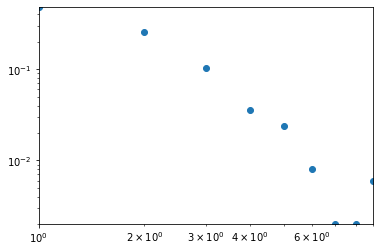

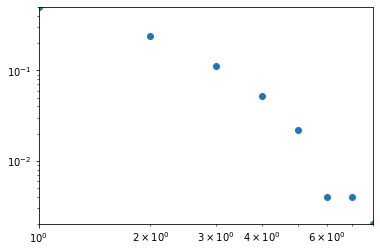

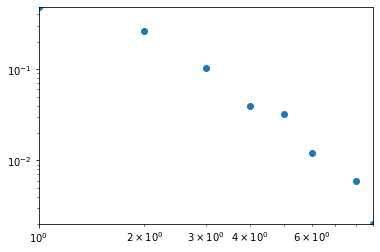

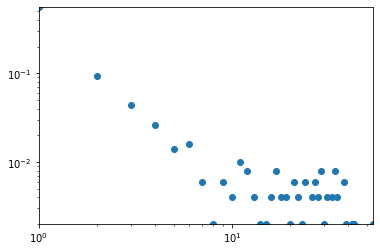

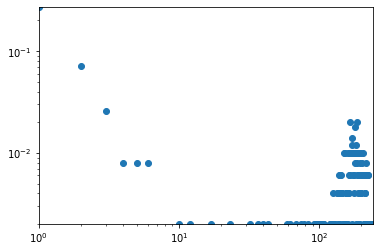

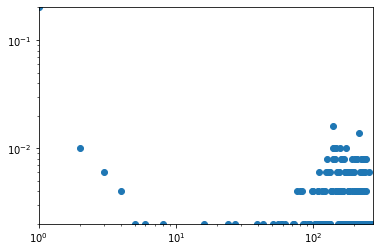

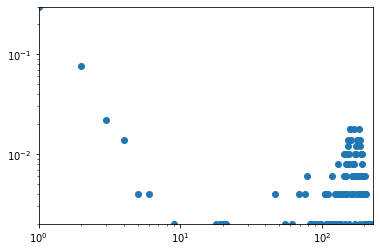

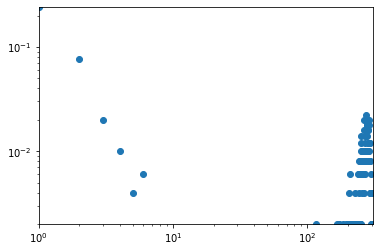

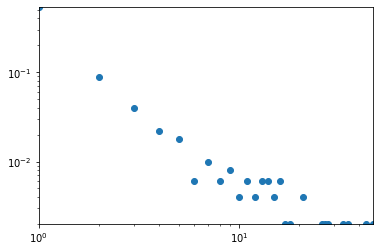

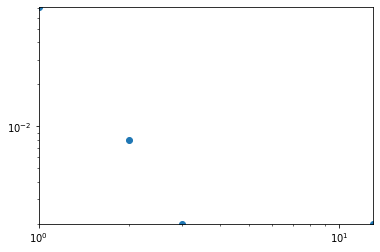

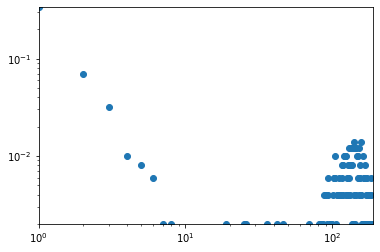

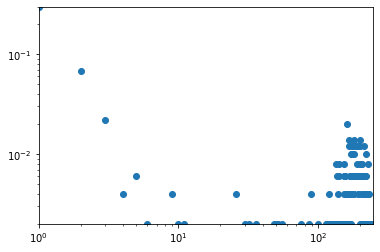

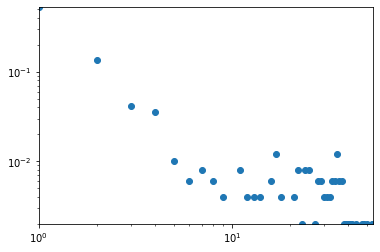

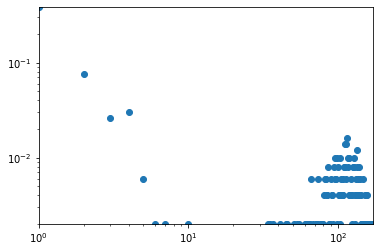

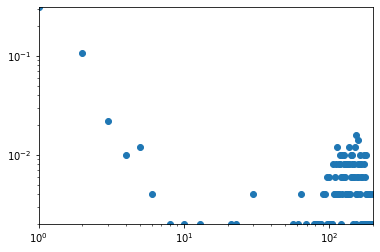

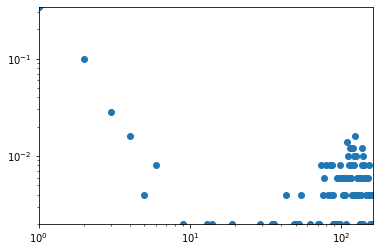

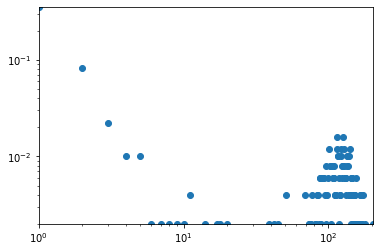

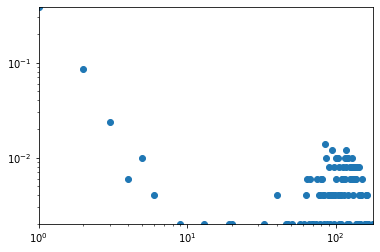

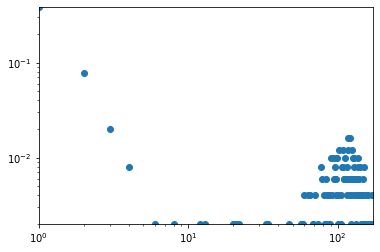

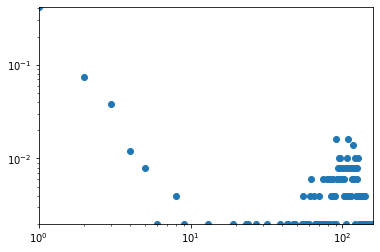

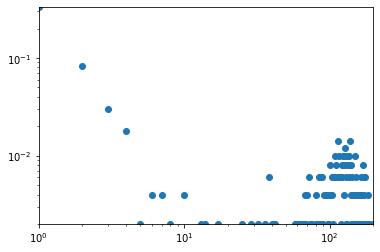

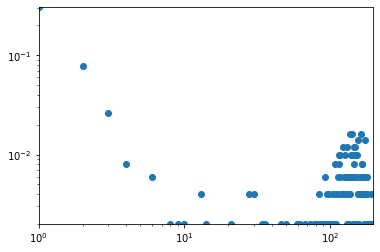

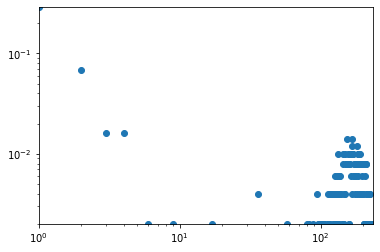

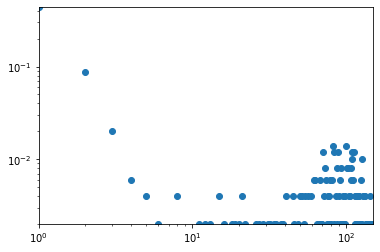

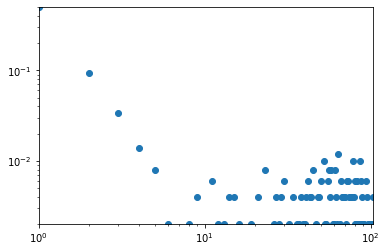

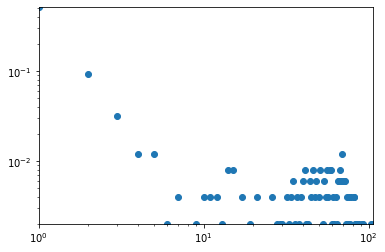

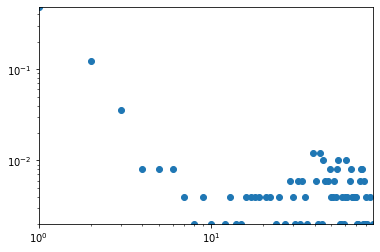

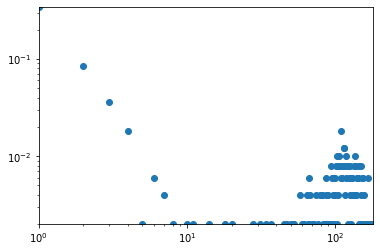

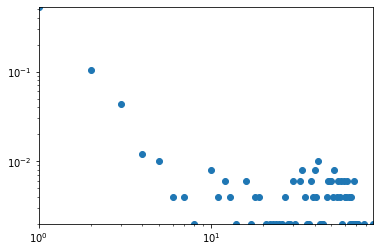

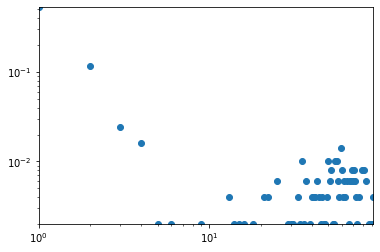

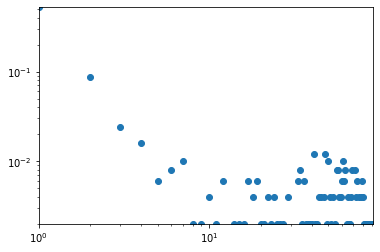

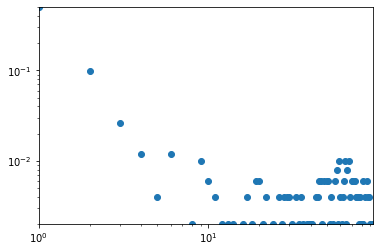

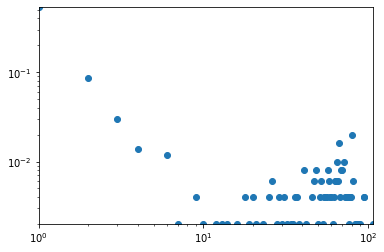

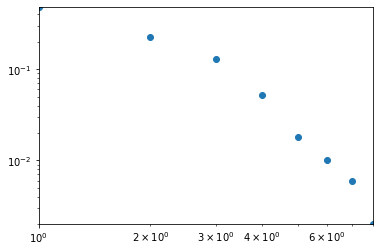

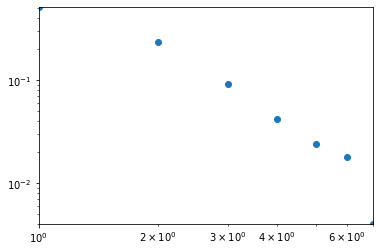

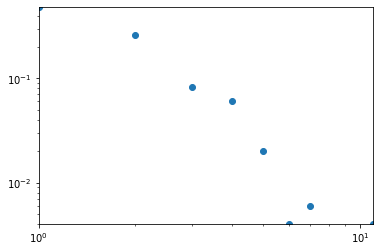

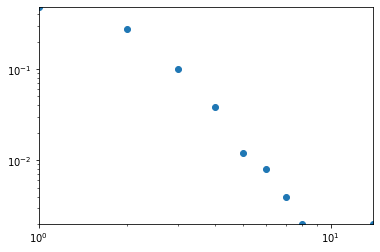

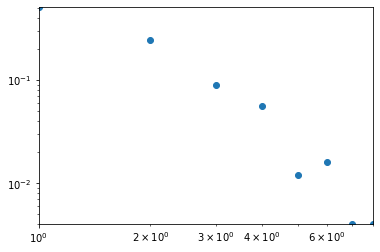

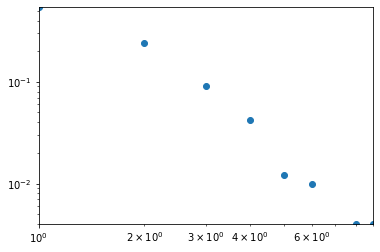

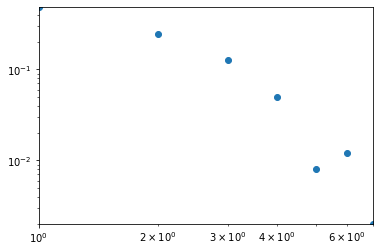

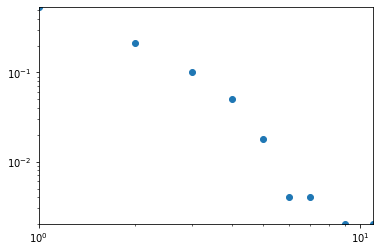

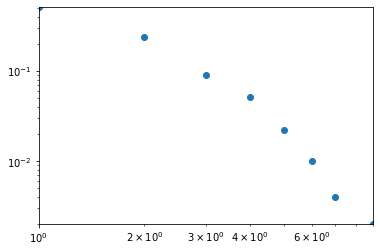

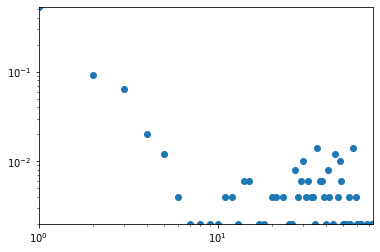

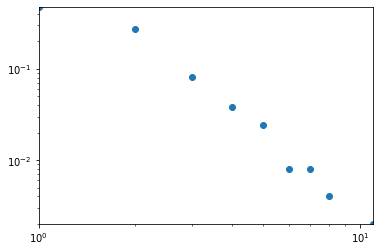

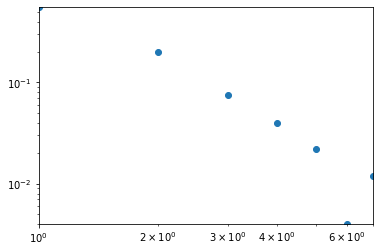

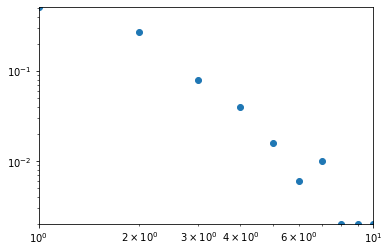

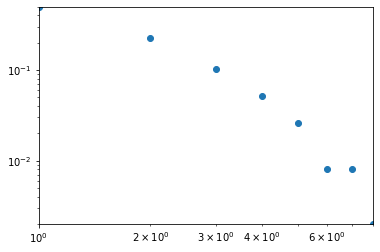

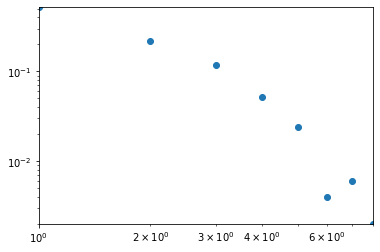

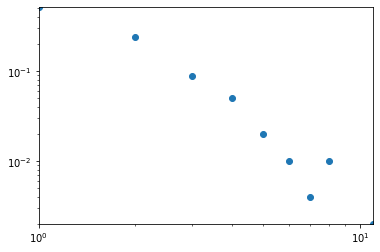

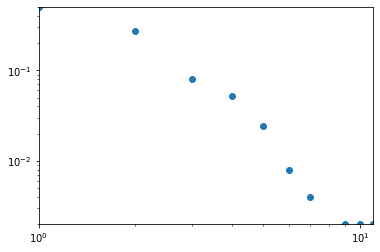

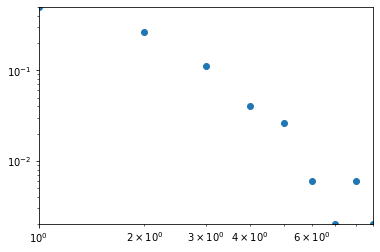

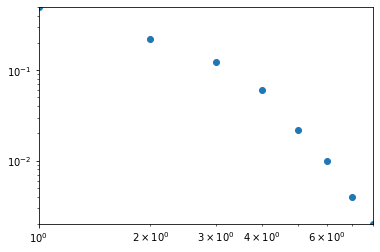

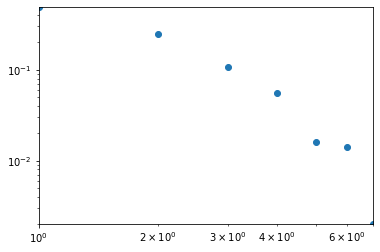

In [229]:
from collections import Counter
for i in range(all_degs.shape[0]):
    for j in range(all_degs.shape[1]):
        for k in range(all_degs.shape[2]):
            c = np.array(sorted(list(Counter(all_degs[i, j, k]).items())))
            degs = c[:, 0]
            counts = c[:, 1]
            counts = counts / np.sum(counts)
            plt.yscale('log')
            plt.xscale('log')
            plt.scatter(degs[1:], counts[1:])
            axes = plt.gca()
            axes.set_xlim([min(degs[1:]),max(degs[1:])])
            axes.set_ylim([min(counts[1:]),max(counts[1:])])
            plt.show()

In [230]:
y.shape

(10, 100, 500, 2)